#**Model Building** 

<br>



In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pickle

#importing some regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#importing some  classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error
import math

acc_arr=[]

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#importing datasets
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAC FFCS/Task1/Bank_Personal_Loan_Modelling (1).csv')


<br>

<br>


#Training Classification Models

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [16]:
from sklearn.model_selection import train_test_split

bank_data = df1

y = bank_data['Personal Loan'];

bank_data.drop('Personal Loan', axis=1)

X = bank_data;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [17]:
LRclass = LogisticRegression()
LRclass.fit(X_train,y_train)

KNNclass = KNeighborsClassifier()
KNNclass.fit(X_train,y_train)

SVMclass = SVC()
SVMclass.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


SVC()

In [18]:
acc_arr2=[]

scoreLR = LRclass.score(X_test, y_test)
print("Logistic Regression score :", scoreLR)
acc_arr2.append(scoreLR*100)

scoreKNN = KNNclass.score(X_test, y_test)
print("KNN score :",scoreKNN)
acc_arr2.append(scoreKNN*100)

scoreSVM = SVMclass.score(X_test, y_test)
print("SVM score :", scoreSVM)
acc_arr2.append(scoreSVM*100)

Logistic Regression score : 0.963
KNN score : 0.89
SVM score : 0.893


<BarContainer object of 3 artists>

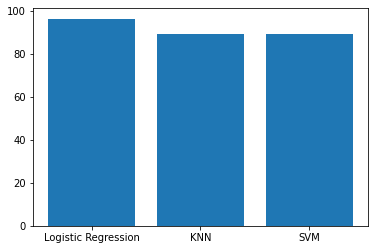

In [20]:
models=["Logistic Regression","KNN", "SVM"]
plt.bar(models,acc_arr2)

In [22]:
filename = 'LogisticRegression.pkl'
pickle.dump(LRclass, open(filename, 'wb'))

filename = 'KNN.pkl'
pickle.dump(KNNclass, open(filename, 'wb'))

filename = 'SVM.pkl'
pickle.dump(SVMclass, open(filename, 'wb'))